# 0.0 - General

## 0.1 - Imports

In [34]:
import warnings

import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import animation
from matplotlib import pyplot as plt
from scipy import stats

## 0.2 - Helper Functions

In [35]:
# Set display configuration
def jupyter_settings():
    plt.style.use("ggplot")
    plt.rcParams["figure.figsize"] = [8, 5]

    pd.options.display.max_columns = 50
    pd.options.display.max_rows = 50
    pd.set_option("display.expand_frame_repr", False)

    warnings.filterwarnings("ignore")

    return None


jupyter_settings()

# 1.0 - Normal Distribution

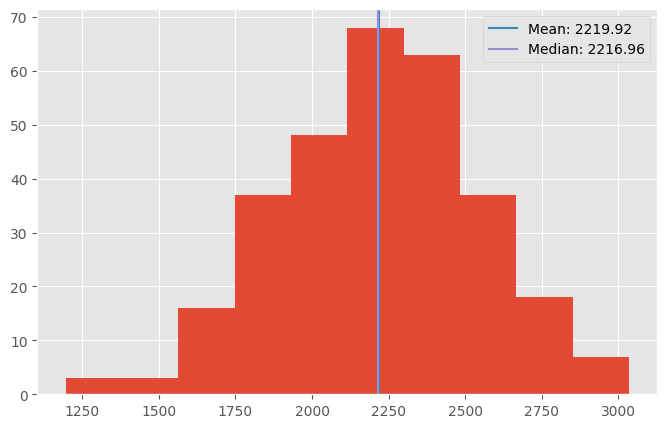

In [36]:
# Create synthetic normal distribution
data = np.random.normal(2200, 300, size=300)
mean = np.mean(data)
median = np.median(data)

plt.hist(data)
plt.axvline(mean, color="C1")
plt.axvline(median, color="C2")
plt.legend([f"Mean: {mean:.2f}", f"Median: {median:.2f}"])

# 2.0 - Exponetial Distribution

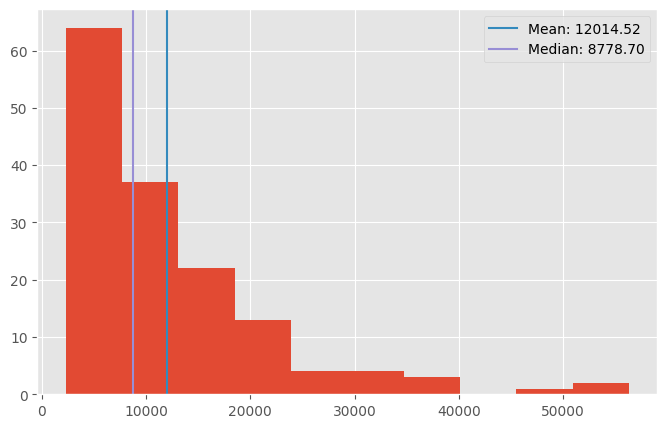

In [37]:
new_data = np.random.exponential(10000, size=150) + mean
mean = np.mean(new_data)
median = np.median(new_data)

plt.hist(new_data)
plt.axvline(mean, color="C1")
plt.axvline(median, color="C2")
plt.legend([f"Mean: {mean:.2f}", f"Median: {median:.2f}"])

# 3.0 - Animation

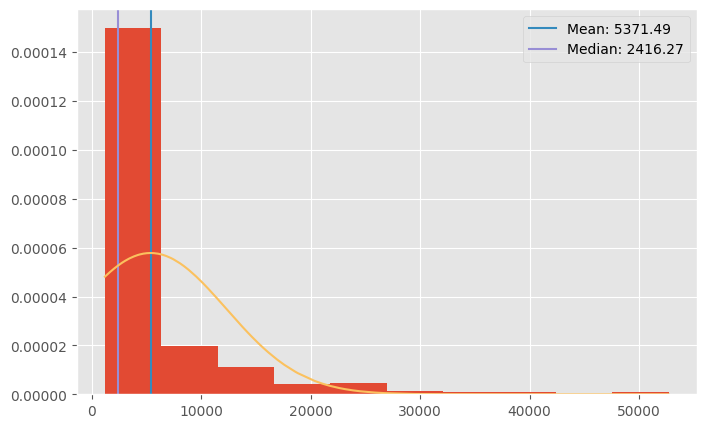

<Figure size 800x500 with 0 Axes>

In [38]:
fig = plt.figure()
new_data.sort()


for i in range(len(new_data)):
    all_data = np.append(data, new_data[0:i])
    all_data.sort()

    mean = np.mean(all_data)
    median = np.median(all_data)
    std = np.std(all_data)

    plt.hist(all_data, density=True)

    plt.axvline(mean, color="C1")
    plt.axvline(median, color="C2")

    pdf = stats.norm.pdf(all_data, mean, std)
    plt.plot(all_data, pdf, color="C4")

    plt.legend([f"Mean: {mean:.2f}", f"Median: {median:.2f}"])

    clear_output(wait=True)
    plt.show()
    plt.gcf()

# 4.0 - Save Animation

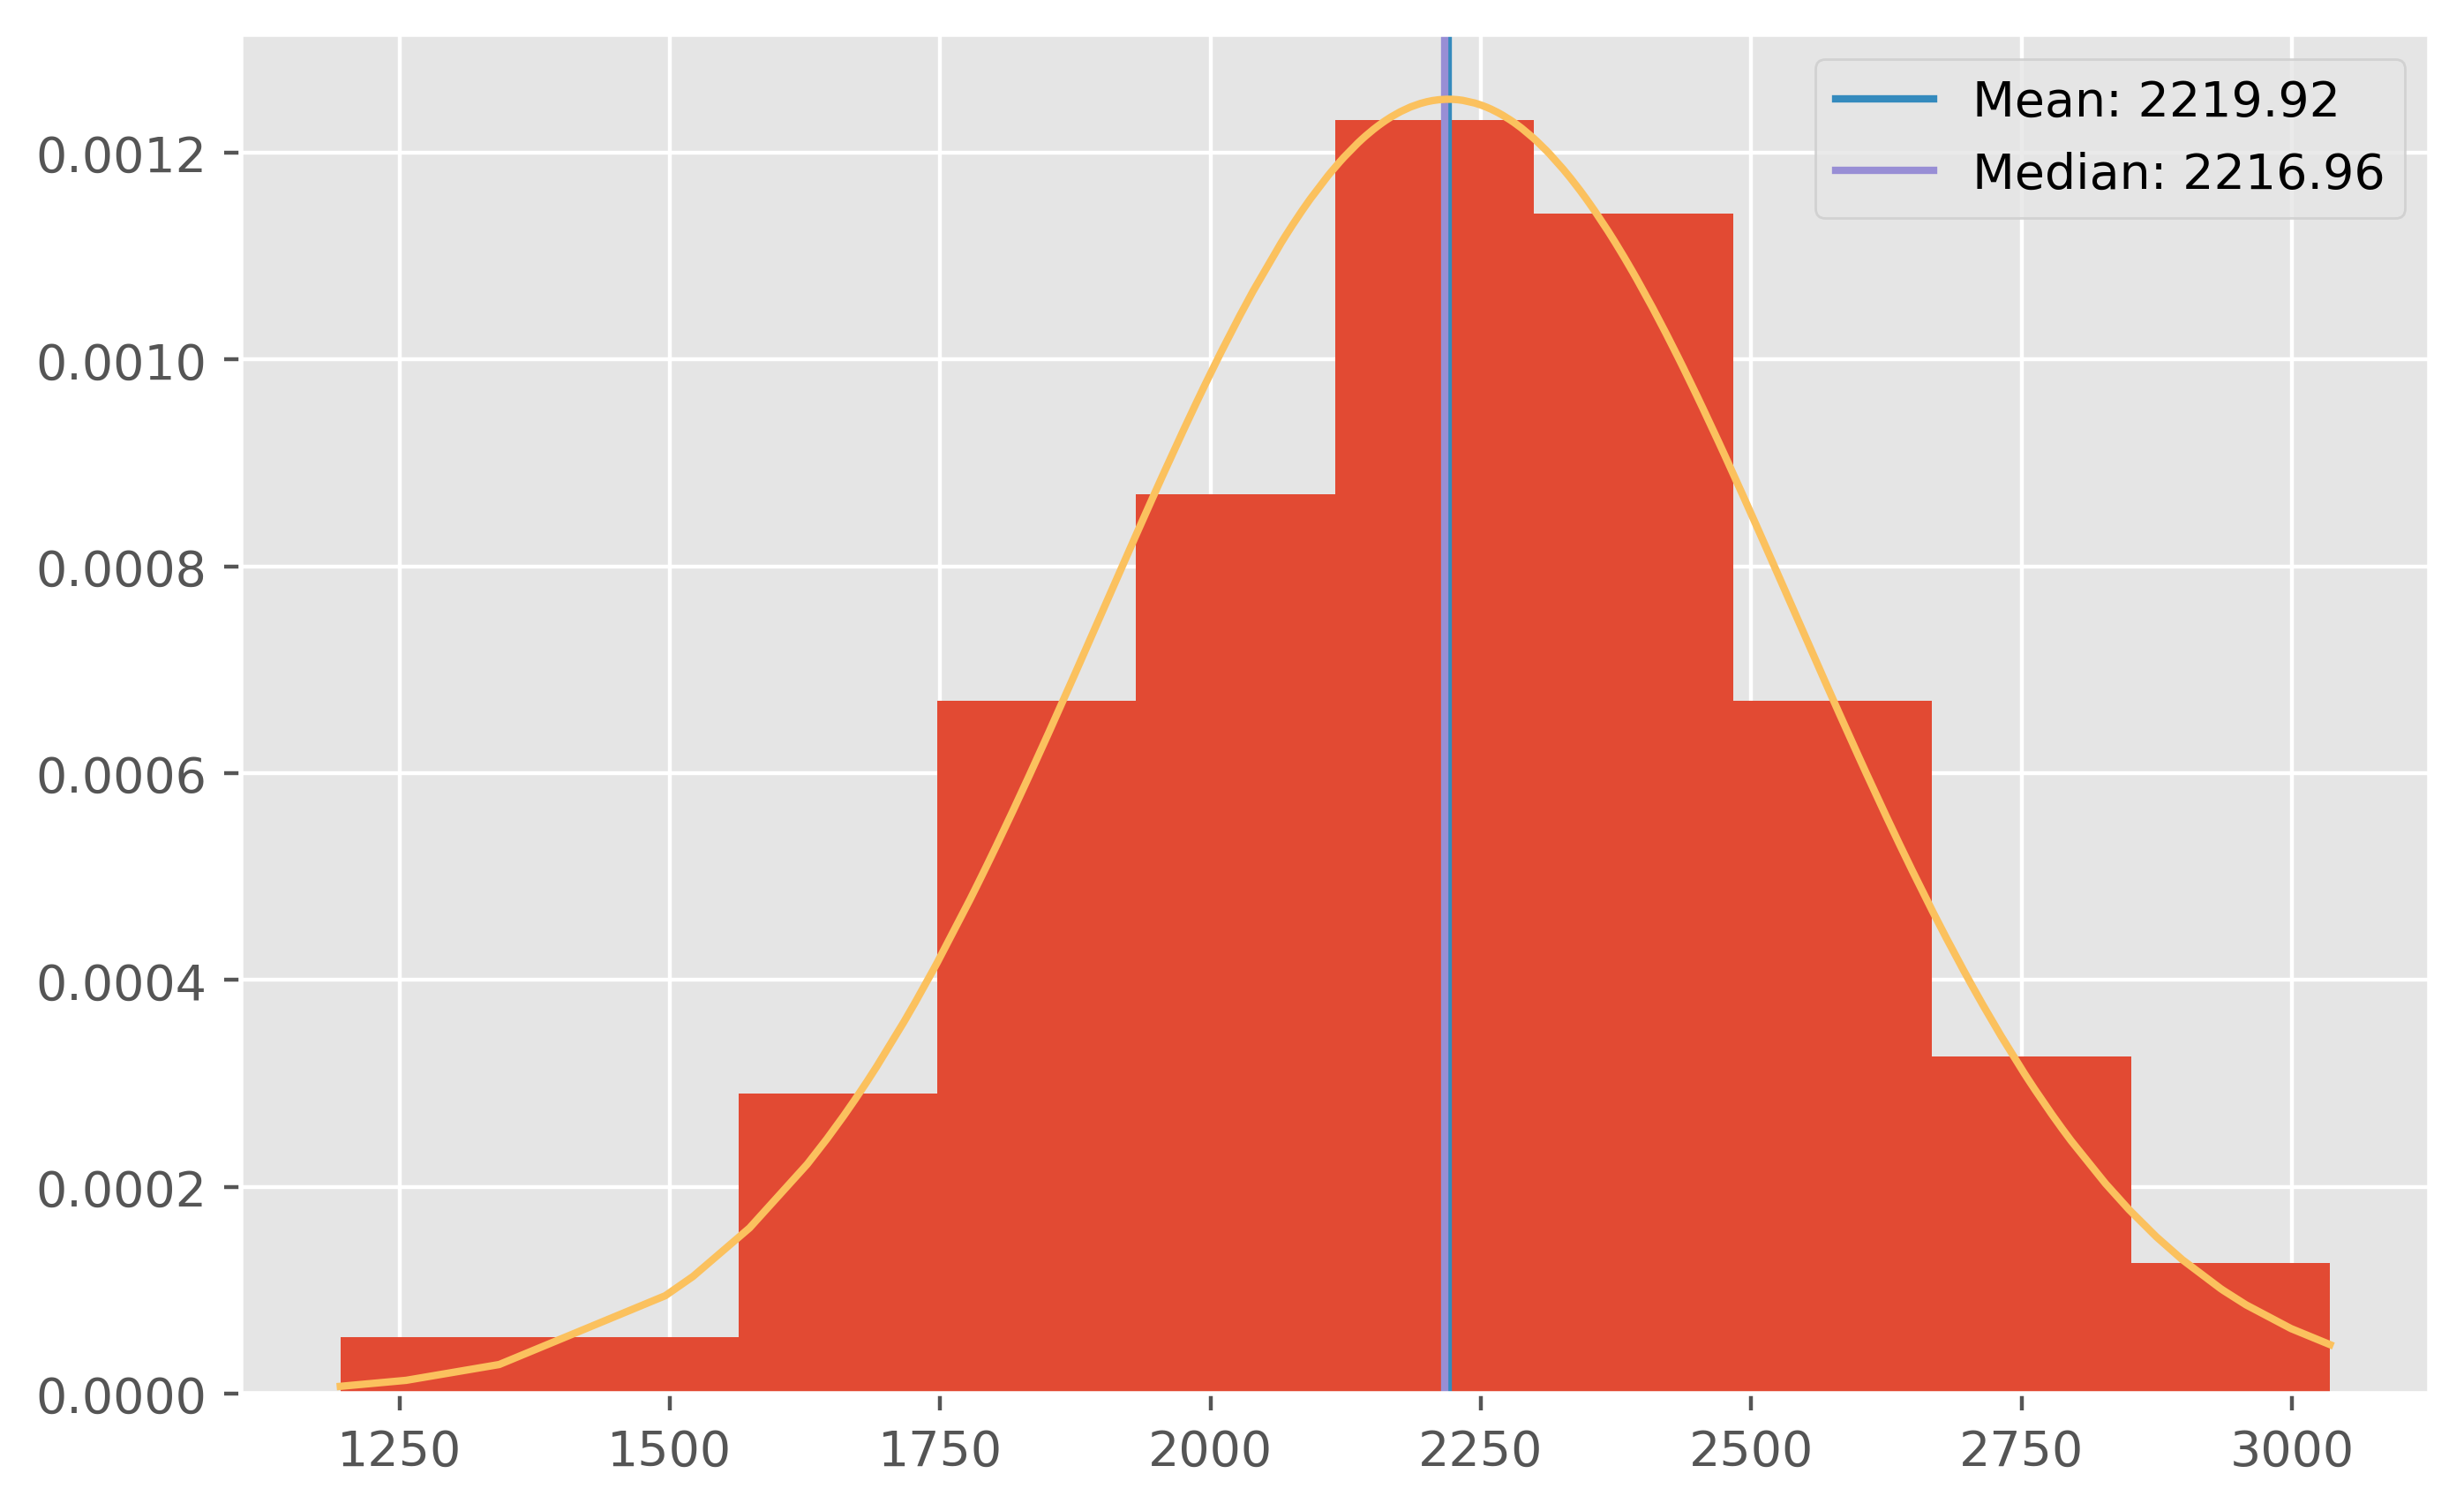

In [42]:
def animate(i, data, new_data):
    all_data = np.append(data, new_data[0:i])
    all_data.sort()

    mean = np.mean(all_data)
    median = np.median(all_data)
    std = np.std(all_data)

    plt.cla()
    plt.hist(all_data, density=True)
    plt.axvline(mean, color="C1")
    plt.axvline(median, color="C2")

    pdf = stats.norm.pdf(all_data, mean, std)

    plt.plot(all_data, pdf, color="C4")
    plt.legend([f"Mean: {mean:.2f}", f"Median: {median:.2f}"])

    return None


fig = plt.figure(figsize=(8, 5), dpi=400)

ani = animation.FuncAnimation(
    fig, animate, len(new_data), fargs=(data, new_data), interval=100
)
ani.save("mean_vs_median.mp4");